<a href="https://colab.research.google.com/github/lcnature/PSY291/blob/main/PSY291_Ch6_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability
We have mentioned that we can think of probability as the expected frequency of obtaining some outcome of a repeatable event.
Let's see some demonstration of this.

Let's assume that we have an unfair coin that lands on head 60% of time. If we throw it for 10 times, how many times are we going to see head? Well due to sampling error, the actual number of heads may vary. But if we throw it for 1000, or a million times, then the frequency of landing on head should be closer to 0.6. This is an exhibition of probability: the expectation of the frequency if we can repeat the random event for infinite times.

In mathematics, the random variable with certain probability of being 0 and certain probability of being 1 is called Bernoulli discrete random variable. It is characterized by the probability of being 1. Let's use 1 to represent head and 0 to represent 0, and simulate tossing a coin for 10 times:

In [ ]:
from scipy.stats import bernoulli
import numpy as np

# We draw Bernoulli variable with 0.6 probability of being 1 for 10 times.
# This simulates tossing a coin that favors the head with probability of 0.6 for 10 times
coin_outcome = bernoulli.rvs(p=0.6, size=10)
# the function rvs generates random samples from a distribution
print('the outcome of 10 random draws of an unfair coin:', coin_outcome)

# Let's calculate how often we got head.
freq_head = np.sum(coin_outcome) / np.size(coin_outcome)
# np.size returns the number of elements in an array)

print('a proportion of ', freq_head, ' of the draws landed on head')


the outcome of 10 random draws of an unfair coin: [0 1 1 1 1 1 0 0 0 0]
a proportion of  0.5  of the draws landed on head


Now let's try to repeat this coin-tossing for more times. We can toss it for 100, 1000, 10000, 100000 and 1000000 times

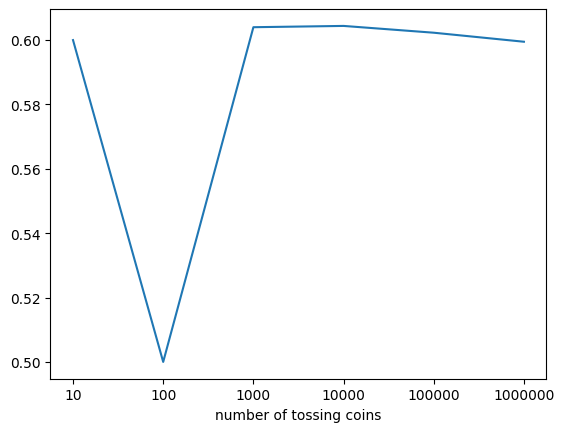

In [ ]:
toss_times = [10, 100, 1000, 10000, 100000, 1000000]
freq_heads = []
# We make an emply list called freq_heads to store the observed frequency of
# landing on heads for different numbers of tossing

for t_time in toss_times:
  coin_outcome = bernoulli.rvs(p=0.6, size=t_time)
  freq_heads.append(np.sum(coin_outcome) / np.size(coin_outcome))

import matplotlib.pyplot as plt

plt.plot(np.log(toss_times), freq_heads)

plt.xlabel('number of tossing coins')
plt.xticks(np.log(toss_times), labels=toss_times)
plt.show()

You can try to run the codes above for more times, and you will see that the frequency is always more stable with more times of tossing.

# Normal distribution (Gaussian distribution)

Let's try to implement the formula of normal distribution by ourselves.


In [ ]:
import numpy as np
def my_pdf(X, mu=0.0, sigma=1.0):
  return (1.0 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-(X - mu) ** 2 / 2.0 / sigma ** 2)

# Here, the keyword `def` means we are defining a function.
# my_pdf is the name of the function, so that after this definition, I can use this
# name to call the function.
# X is the name for the first input to the function.
# For the second and third inputs mu and sigma, we give them default values
# 0 and 1. This means that we don't have to provide mu and sigma to this function.
# The function will automatically assign 0 and 1 to them. But if we want,
# we can provide different values for mu or sigma, so that the function can
# behave differently.


Now, let's see how a normal distribution with μ of 2 and σ of 3 look like.
We can plot it over a range of X from -10 to 10

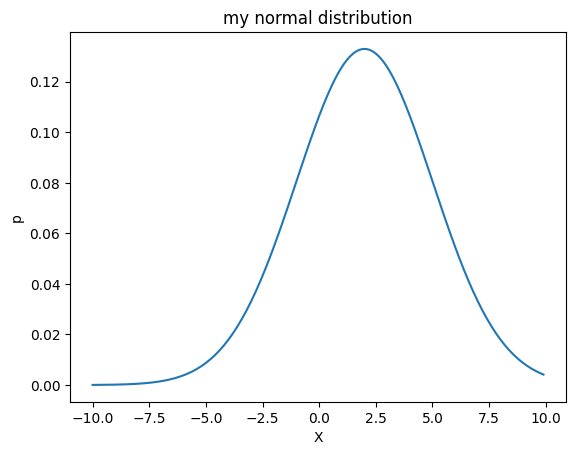

In [ ]:
X = np.arange(-10, 10, 0.1)
p = my_pdf(X, mu=2.0, sigma=3.0)


# Then we plot the curve
plt.plot(X, p)
plt.xlabel('X')
plt.ylabel('p')
plt.title('my normal distribution')
plt.show()

# Finding probabilities for z-scores

This is an exercise in the slides.

For a standard normal distribution (μ=0, σ=1), what is the probability that $X<0.5$?

We first import a module for normal distribution from the package of `scipy.stats`, named `norm`.


In [ ]:
from scipy.stats import norm

The cumulative distribution function for normal distribution has already been implemented, called `cdf`. All we need to do is to feed it with a z-value.

In [ ]:
z = 0.5
area_left = norm.cdf(z)
print('The probability that z<0.5 is: ', area_left)

The probability that z<0.5 is:  0.6914624612740131


## Practice
Now it is your turn. Can you borrow the code above to calculate the probability $p(-1<z<1)$?

You can fill in your code below:

In [ ]:
from scipy.stats import norm
z1 = -1.0
z2 = 1.0

# what should we do next?

# after completing your code above, fill the variable in the line below
# after the comma to print the result.
print('p(-1<z<1) = ', )


## finding z-scores corresponding to certain probabilities

How to find the range of the middle 90% of the commute time in the US, assuming that the distribution is normal with mean of 26.1 and standard deviation of 10?

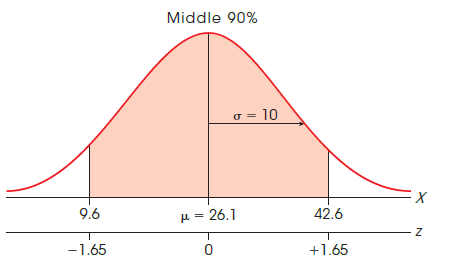

The inverse of the cumulative distribution function is implemented by a function called `ppf`.

For any value of the area under the curve of a standard normal distribution up to a z-score, it returns the correct z-value that gives to the area.


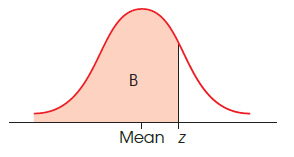

In the example above, the area under each of the tail is:


In [ ]:
area_tail = (1.0 - 0.9) / 2
print(area_tail)

0.04999999999999999


So to identify the upper boundary for the middle 90% of the population, we look for the z-score such that the area on its right side is 0.05, which means the area on its left side is 0.95:

In [ ]:
from scipy.stats import norm
area_left = 1 - area_tail
z_right = norm.ppf(area_left)

To identify the lower bound for the middle 90% of the pupulation, we simply look for the z-score such that the area on its left side is 0.05:

In [ ]:
z_left = norm.ppf(area_tail)

Then we can print our conclusion:

In [ ]:
print('the range of middle 90% of the distribution of commute time is from ',
      z_left, ' to', z_right)

the range of middle 90% of the distribution of commute time is from  -1.6448536269514729  to 1.6448536269514722


# Homework (6,7,16,19)

Fill out your own code below.

Hint: make use of the `cdf` and `ppf` functions

## problem 6
Find each of the following probabilities for a normal distribution:

- p(z>1.25)
- p(z>-0.60)
- p(z<0.70)
- p(z<-1.30)

In [ ]:
from scipy.stats import norm



## Problem 7
What proportion of a normal distribution is located between each of the following z-score boundaries?

- z = -0.25 and z = +0.25
- z = -0.67 and z = +0.67
- z = -1.20 and z = +1.20

## Problem 16

According to a recent report, people smile an average of μ = 62 time per day. Assuming that the distribution of smiles is approximately normal with a standard deviation of σ = 18, find each of the following values.

- What proportion of people smile more than
80 times a day?
-  What proportion of people smile at least 50 times a day?

## Problem 19

A consumer survey indicates that the average household spends μ = \$185 on groceries each week. The distribution of spending amounts is approximately normal with a standard deviation of σ = \$25. Based on this distribution,

- What proportion of the population spends more
than \$200 per week on groceries?
- What is the probability of randomly selecting a
family that spends less than \$150 per week on
groceries?
- How much money do you need to spend on
groceries each week to be in the top 20% of the
distribution?